**Required Libraries**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.shape

(400, 5)

In [16]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [17]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [18]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

**Input and** **Output**

In [20]:
x=df.iloc[:,2:-1].values


In [22]:
y=df.iloc[:,-1:].values

**Train test split**

In [23]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [24]:
Xtrain.shape

(320, 2)

In [25]:
Xtest.shape

(80, 2)

**Standard scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
Xtrain=scaler.fit_transform(Xtrain)

In [28]:
Xtest=scaler.transform(Xtest)

**KNN ALGORITHEM**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2,p=2) #n_neighbors implies k=2 and p=2  implies distance formula is euclidean


**TRAIN OUR MODEL**

In [31]:
KNN.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [32]:
Ypred=KNN.predict(Xtest)

**accuracy score**

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,Ypred)

0.8875

**Confusion matrix**

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest,Ypred)

array([[56,  2],
       [ 7, 15]])

**Method 2 for K**

In [ ]:
accuracy=[]

for i in range(1,26):
  KNN=KNeighborsClassifier(n_neighbors=i)
  KNN.fit(Xtrain,Ytrain)
  accuracy.append(accuracy_score(Ytest,KNN.predict(Xtest)))



In [40]:
len(accuracy)

25

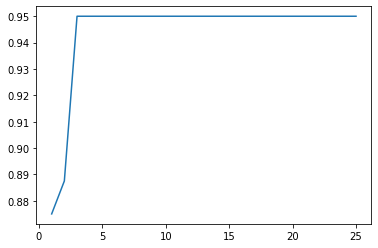

In [43]:
plt.plot(range(1,26),accuracy)